<a href="https://colab.research.google.com/github/karanbishtt/text-to-3d-generator/blob/main/TEXT_TO_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.makedirs("photo_to_3d/inputs", exist_ok=True)
os.makedirs("photo_to_3d/outputs", exist_ok=True)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving photo_to_3d_project.zip to photo_to_3d_project.zip


In [3]:
!unzip photo_to_3d_project.zip

Archive:  photo_to_3d_project.zip
 extracting: requirements.txt        
 extracting: README.md               


In [4]:
!pip install trimesh plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.3/709.3 kB 10.8 MB/s eta 0:00:00


In [6]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [7]:
!git clone https://github.com/openai/shap-e.git
%cd shap-e
!pip install -e .

Cloning into 'shap-e'...
remote: Enumerating objects: 336, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 336 (delta 35), reused 13 (delta 13), pack-reused 281 (from 2)
Receiving objects: 100% (336/336), 11.72 MiB | 20.04 MiB/s, done.
Resolving deltas: 100% (43/43), done.
/content/shap-e
Obtaining file:///content/shap-e
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-install-7ksm_lht/clip_588e7177a576456fa82fb4eb6cfd17e8
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-install-7ksm_lht/clip_588e7177a576456fa82fb4eb6cfd17e8
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [3]:
import torch
from shap_e.models.download import load_model, load_config
from shap_e.diffusion.gaussian_diffusion import diffusion_from_config
from shap_e.diffusion.sample import sample_latents
from shap_e.util.notebooks import decode_latent_mesh
import trimesh

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transmitter = load_model('transmitter', device=device)
model = load_model('text300M', device=device)
diffusion = diffusion_from_config(load_config('diffusion'))

latents = sample_latents(
    batch_size=1,
    model=model,
    diffusion=diffusion,
    guidance_scale=15.0,
    model_kwargs=dict(texts=["a toy house"]),
    progress=True,
    device=device,

    clip_denoised=True,
    use_fp16=False,
    use_karras=True,
    karras_steps=32,
    sigma_min=0.02,
    sigma_max=200.0,
    s_churn=0.0,
)

decoded_mesh = decode_latent_mesh(transmitter, latents[0])
mesh = decoded_mesh.to_trimesh()

output_path = '/content/photo_to_3d/outputs/model_from_text.obj'
mesh.export(output_path)

  0%|          | 0/32 [00:00<?, ?it/s]

AttributeError: 'TorchMesh' object has no attribute 'to_trimesh'

In [5]:
from shap_e.util.notebooks import decode_latent_mesh

torch_mesh = decode_latent_mesh(transmitter, latents[0])

mesh = torch_mesh.tri_mesh()

output_path = '/content/photo_to_3d/outputs/model_from_text.obj'
with open(output_path, 'w') as f:
    mesh.write_obj(f)

print(f"3D model saved to: {output_path}")

3D model saved to: /content/photo_to_3d/outputs/model_from_text.obj


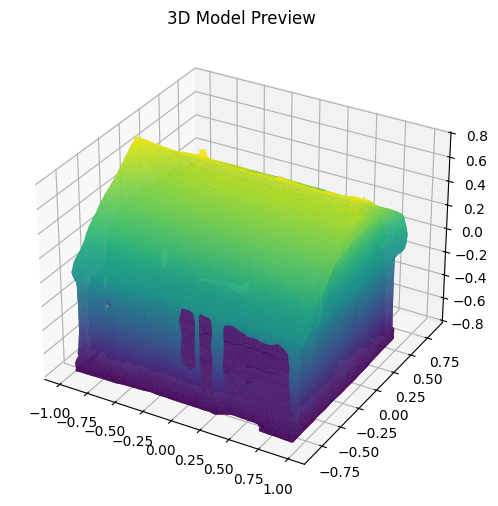

In [6]:
import trimesh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mesh = trimesh.load('/content/photo_to_3d/outputs/model_from_text.obj')

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(mesh.vertices[:, 0], mesh.vertices[:, 1], mesh.faces,
                mesh.vertices[:, 2], cmap='viridis', linewidth=0.2)

ax.set_title("3D Model Preview")
plt.show()

In [7]:
from google.colab import files
files.download('/content/photo_to_3d/outputs/model_from_text.obj')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>